Produces two plots:
  - `fig`: Figure in main text
  - `suppfig`: Full posterior shown in supplementary

In [1]:
from etc.init import *
import etc.figureslib as lib

import NotebookScripter
from NotebookScripter import run_notebook, receive_parameter
NotebookScripter.set_notebook_option(with_matplotlib_backend=None)
savefig = receive_parameter(savefig=False)
saveext = receive_parameter(saveext='pdf')
try:
    data
except NameError:
    data = receive_parameter(data=None)

mplconfig = run_notebook("Figures_matplotlib_config.ipynb")
inject_vars(mplconfig, globals())
if data is None:
    data = run_notebook("Figures_load_data.ipynb")
records = data.records

[monochrome_palette]: value was greater than 1 and was clipped.



import copy
import os.path
import itertools
from collections import Iterable, OrderedDict, namedtuple, deque
import numpy as np
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image
from matplotlib.gridspec import GridSpec
import pymc3 as pymc
import pandas as pd
from pandas import DataFrame
from parameters import ParameterSet

from importlib import reload

import theano_shim as shim

import mackelab as ml
import mackelab.smttk as smttk
import mackelab.iotools
import mackelab.pymc3
import mackelab.parameters
import mackelab.plot
ml.parameters.Transform.namespaces['shim'] = shim

import sinn
import sinn.histories as histories
import sinn.models
from sinn.optimize.gradient_descent import FitCollection
import sinn.analyze as anlz
from sinn.analyze.axisdata import LogLikelihood, Likelihood, Probability
from sinn.analyze.axis import Axis

import fsGIF.core as core
import fsGIF.fsgif_model as fsgif_model
from fsGIF.fsgif_model

In [2]:
outputname = "Fig6"

In [3]:
records.filter.script('mcmc').summary.head(15)

,# records,reason,outcome,tags,main_file,avg . duration
20180831-065439,1,mcmc_2pop_all-but-ur-uth_sin-wn,,,fsGIF/fsGIF/mcmc.py,201h 37m 56s
20180330-191651,1,,,,fsGIF/fsGIF/mcmc.py,228h 38m 21s
20180330-191626,1,,,,fsGIF/fsGIF/mcmc.py,71h 52m 29s
20180329-175643,1,,,,fsGIF/fsGIF/mcmc.py,8h 46m 38s
20180329-175558,1,,,,fsGIF/fsGIF/mcmc.py,8h 38m 16s
20180329-175533,1,,,,fsGIF/fsGIF/mcmc.py,8h 44m 16s
20180320-234026,1,,,,fsGIF/fsGIF/mcmc.py,169h 14m 56s
20180320-233921,1,,,,fsGIF/fsGIF/mcmc.py,102h 31m 54s
20180320-233749,1,,,,fsGIF/fsGIF/mcmc.py,108h 14m 13s
20180318-181234,1,,,,fsGIF/fsGIF/mcmc.py,46h 41m 43s


In [28]:
reload(lib)

<module 'etc.figureslib' from '/home/alex/Recherche/macke_lab/writing/papers/meso_inference/working_copy/meso_inference/etc/figureslib.py'>

In [3]:
figrecords = lib.RecordSet(['20180831-065439', '20181105-160516'], nodill=False, min_data=0)

In [4]:
figrecords.recordlist.list.summary

,# records,reason,outcome,tags,main_file,avg . duration
20181105-160516,1,mcmc_2pop_all-vars_chain-1\nCreate record for pre-existing MCMC run,,,fsGIF/fsGIF/mcmc.py,0h 00m 02s
20180831-065439,1,mcmc_2pop_all-but-ur-uth_sin-wn,,,fsGIF/fsGIF/mcmc.py,201h 37m 56s


In [5]:
# Hack because MCMC data was saved with 'nosync'
figrecords['20180831-065439_1'].outputpath = [
    '/home/alex/Recherche/macke_lab/run/fsGIF/data/mcmc/6b19ced0fd59a8f39217d094ce2d5664bf7df93a.dill']
# Hack because MCMC data was not recorded due to bug.
# A subsequent run was made with the same parameters.
figrecords['20181105-160516'].outputpath = [
    '/home/alex/Recherche/macke_lab/run/fsGIF/data/mcmc/e8dda1ae1532286eac26fa59101dfe1559008f58.dill']

In [6]:
traces = None
for lbl, rec in figrecords.records.items():
    rec.load()
    mtrace = ml.pymc3.import_multitrace([data._data for data in rec.data.values()])
    if traces is None:
        traces = mtrace
    else:
        traces._straces.update(mtrace._straces)

In [ ]:
#traces.nchains

In [ ]:
#pymc.traceplot(traces);

In [ ]:
#pymc.autocorrplot(traces, max_lag=1000);

In [ ]:
#pymc.effective_n(traces)

In [33]:
display_names = {
    'w'   : [['$w_{EE}$',  '$w_{EI}$'],
             ['$w_{IE}$',  '$w_{II}$']],
    'τ_m' : [r'$τ_{m,E}$', r'$τ_{m,I}$'],
    'τ_s' : [r'$τ_{s,E}$', r'$τ_{s,I}$'],
    'τ_θ' : [r'$τ_{θ,E}$'],
    'J_θ' : [r'$J_{θ,E}$'],
    'c'   : [r'$c_E$', r'$c_I$'],
    'Δu'  : [r'$Δu_E$', r'$Δu_I$']
}
# Titles on diagonal
descs = {
    'w'   : [["Exc.–exc.\nconnectivity",  "Inh.–exc.\nconnectivity"],
             ["Exc.–inh.\nconnectivity",  "Inh.–inh.\nconnectivity"]],
    'τ_m' : ["Excitatory\ntime-scale", "Inhibitory\ntime-scale"],
    'τ_s' : ["Exc. synaptice\ntime-scale", "Inh. synaptic\ntime-scale"],
    'τ_θ' : ["Exc. adaptation\ntime-scale", "Inh. adaptation\ntime-scale"],
    'J_θ' : ["Exc. adaptation\nstrength", "Inh. adaptation\nstrength"],
    'c'   : ["Exc. firing rate\nat threshold", "Inh. firing rate\nat threshold"],
    'Δu'  : ["Exc. noise level", "Inh. noise level"]
}

In [34]:
# Blank column titles
descs = {
    'w'   : [["",  ""],
             ["",  ""]],
    'τ_m' : ["", ""],
    'τ_s' : ["", ""],
    'τ_θ' : ["", ""],
    'J_θ' : ["", ""],
    'c'   : ["", ""],
    'Δu'  : ["", ""]
}

In [35]:
posterior_params = ml.parameters.params_to_arrays(rec.parameters.posterior)
flat_params = core.get_trace_params(traces, posterior_params,
                                    displaynames=display_names,
                                    descriptions=descs)

In [37]:
marginals = anlz.axisdata.MarginalCollection(traces, flat_params,
                                            #threshold=1e-1,
                                            histogram_kwargs={'bins': 'auto'},
                                            maxexpand=1)

In [38]:
groundtruth_markers = ml.parameters.params_to_arrays(posterior_params.model.params)
marginals.set_markers(groundtruth_markers, alphas=1.)
logsubs = (.2, .4, .6, .8, 1)
τmlogsubs = tuple(np.arange(.1, 1.01, .1))
def ticklbl(b,p):
    lbl = "{} \\!\\!\\times\\!\\! 10^{{{}}}".format(b,p)
    return "$\\mathdefault{" + lbl + "}$"
def hack_remove_double_printing(ax):
    pass
    ax.set_xticks([]); ax.set_xticklabels([])
    ax.set_yticks([]); ax.set_yticklabels([])
def set_lims(ax, axis, low, high):
    if isinstance(axis, mpl.axis.XAxis):
        ax.set_xlim(low, high)
    else:
        ax.set_ylim(low, high)
def τmE_format(ax, axis):
    axis.set_ticks([1e-2, 1.5e-2])
    axis.set_ticklabels([ticklbl(1,-2), ticklbl(1.5, -2)])
    #ax.ticklabel_format(style='sci', scilimits=(-2, 3), axis=axis.axis_name, useMathText=True)
    #set_lims(ax, axis, 0.008, 0.05)
    #axis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=τmlogsubs))
    #hack_remove_double_printing(ax)
def τmI_format(ax, axis):
    axis.set_ticks([1e-2, 1.5e-2])
    axis.set_ticklabels([ticklbl(1,-2), ticklbl(1.5, -2)])
    #ax.ticklabel_format(style='sci', scilimits=(-2, 3), axis=axis.axis_name, useMathText=True)
    #set_lims(ax, axis, 0.008, 0.05)
    #axis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=τmlogsubs))
    #hack_remove_double_printing(ax)
def τθE_format(ax, axis):
    ax.ticklabel_format(style='sci', scilimits=(-2, 3), axis=axis.axis_name, useMathText=True)
    #set_lims(ax, axis, 0.01, 100)
    #axis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=logsubs))
    #hack_remove_double_printing(ax)
def τsE_format(ax, axis):
    axis.set_ticks([2e-3, 4e-3])
    axis.set_ticklabels([ticklbl(2,-3), ticklbl(4,-3)])
    #ax.ticklabel_format(style='sci', scilimits=(-2, 3), axis=axis.axis_name, useMathText=True)
    #tmp = [t.get_loc() for t in axis.get_major_ticks()]
    #axis.set_ticklabels([t.get_loc() * 100 for t in axis.get_major_ticks()])
    #axis.set_ticklabels([t.get_loc() * 100 for t in axis.get_minor_ticks()], minor=True)
    #print([t.get_loc() for t in axis.get_minor_ticks()])
    #lbl = axis.label.properties()['prop_tup'][2]
    #axis.set_label(lbl + " $\\times 10^2$")
    #hack_remove_double_printing(ax)
def τsI_format(ax, axis):
    axis.set_ticks([5e-3, 10e-3])
    axis.set_ticklabels([ticklbl(4,-3), ticklbl(1, -4)])
    #ax.ticklabel_format(style='sci', scilimits=(-2, 3), axis=axis.axis_name, useMathText=True)
    #axis.set_minor_locator(mpl.ticker.LogLocator(base=10, subs=logsubs))
    # Hack to avoid double printing
    #if isinstance(axis, mpl.axis.XAxis):
    #    ax.set_xticks([]); ax.set_xticklabels([])
    #hack_remove_double_printing(ax)
    pass
if True:
    marginals.set_axis('τ_m^E', scale='linear', apply=τmE_format)
    marginals.set_axis('τ_m^I', scale='linear', apply=τmI_format)
    marginals.set_axis('τ_θ^E', scale='linear', apply=τθE_format)
    marginals.set_axis('τ_s^E', scale='linear', apply=τsE_format)
    marginals.set_axis('τ_s^I', scale='linear', apply=τsI_format)

In [13]:
width  = .40*maxwidth
height = .35*maxwidth

    def flatten_axis(axis, p, d=0):
        ax = axis.axes
        s = '{:.' + str(d) + 'f}'
        axis.set_ticklabels([s.format((t.get_loc() * 10**p)) for t in axis.get_minor_ticks()], minor=True)
        axis.set_ticklabels([s.format((t.get_loc() * 10**p)) for t in axis.get_major_ticks()], minor=False)
        lbl = axis.label.properties()['prop_tup'][2]
        axis.label.set_text(lbl + r"${}_{\times 10^" + str(p) + "}$")
        #ax.text(0, 1, r"$\times 10^{" + str(-p) + "}$", ha='right', va='top', fontsize=4.5, color='black', transform=ax.transAxes)

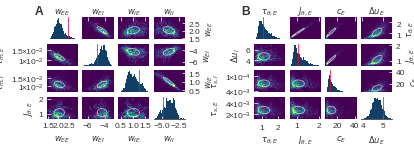

In [18]:
#fig = plt.figure(figsize=(2*width + .5, height))
fig = plt.figure(figsize=(maxwidth, height))
subrefheight = .15

gs = GridSpec(1,2)

axes = lib.plot_marginals(marginals, gridspec=gs[0], stddevs=[{'width': 2, 'color': 'white', 'linewidth': 0.75, 'alpha': 0.7}],
                          cols = ['$w_{EE}$', '$w_{EI}$', '$w_{IE}$', '$w_{II}$'],
                          upper_rows = ['$w_{EE}$', '$w_{EI}$', '$w_{IE}$'],
                          lower_rows = ['$τ_{m,E}$', '$τ_{m,I}$', '$J_{θ,E}$'])
#ml.plot.subreflabel(axes[0,0], 'a', y=1+ml.plot.inches_to_yaxes(subrefheight, ax=axes[0,0]))

#plt.draw()
#flatten_axis(axes[2,0].yaxis, 2, 1)
#flatten_axis(axes[1,0].yaxis, 2, 1)

ml.plot.subreflabel(axes[0,0], 'a', x=-.4)
ml.plot.subplots_adjust_margins(top=subrefheight + 0.1)  # +0.1 to also make space for top labels

axes  = lib.plot_marginals(marginals, gridspec=gs[1], stddevs=[{'width': 2, 'color': 'white', 'linewidth': 0.75, 'alpha': 0.7}],
                           cols = ['$τ_{θ,E}$', '$J_{θ,E}$', '$c_E$', '$Δu_E$'],
                           upper_rows = ['$τ_{θ,E}$', '$J_{θ,E}$', '$c_E$'],
                           lower_rows = ['$Δu_I$', '$τ_{s,I}$', '$τ_{s,E}$'])

#lib.align_labels(fig)
#plt.draw()

#plt.draw()   
#flatten_axis(axes[3,0].yaxis, 3)
#flatten_axis(axes[2,0].yaxis, 3)
#ax = axes[3,0]
#ax.set_yticks([2e-3, 4e-3])
#ax.set_ylim([1e-3, 6e-3])
#plt.draw()
    
plt.draw()

#ml.plot.subreflabel(axes[0,0], 'b', y=1+ml.plot.inches_to_yaxes(subrefheight, ax=axes[0,0]))
ml.plot.subreflabel(axes[0,0], 'b', x=-.4)
ml.plot.subplots_adjust_margins(fig=fig, left=0.65, top=subrefheight + 0.1, right=0.3)  # +0.1 to also make space for top labels
gs.update(wspace=.5)

assert(outputname == "Fig6")
if savefig:
    plt.savefig("figures/" + outputname.strip('.') + '.' + saveext.strip('.'))

In [19]:
effn = {key: np.round(v, 1) for key, v in pymc.effective_n(traces).items()}

index = pd.MultiIndex.from_tuples([('Effective sample size',varname) for varname in effn])
effndf = pd.DataFrame(
    [[vals] for vals in effn.values()],
    columns=['value'], index=index)
index = pd.MultiIndex.from_tuples([('chains', stat) for stat in ['No. of chains', 'Length of each chain']])
df = pd.DataFrame([traces.nchains, len(traces)],
                  index=index, columns=['value'])
pd.concat([df, effndf])

value
chains                No. of chains                                2
                      Length of each chain                      2000
Effective sample size logτ_m                            [18.5, 20.5]
                      logτ_s                            [25.7, 18.0]
                      w                     [21.1, 14.4, 17.0, 15.9]
                      logτ_θ                                  [19.6]
                      c                                [17.6, 362.1]
                      J_θ                                     [17.8]
                      Δu                                [41.6, 25.2]

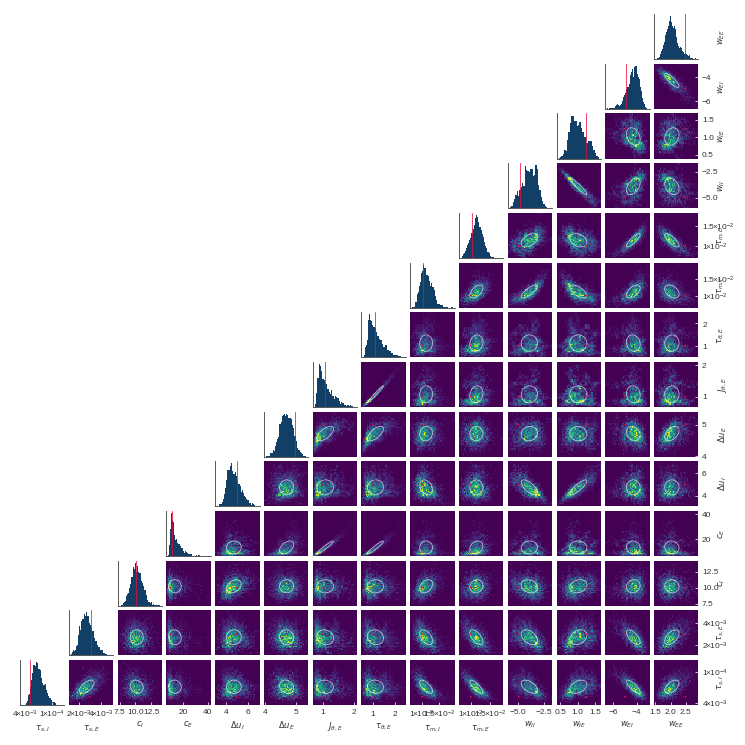

In [20]:
width = 1.8*maxwidth
height = width
marginals.plot_grid(names_to_display=['w^EE', 'w^EI', 'w^IE', 'w^II', 'τ_m^E', 'τ_m^I', 'τ_θ^E']
                    + ['J_θ^E', 'Δu^E', 'Δu^I', 'c^E', 'c^I', 'τs^E', 'τs^I'],
                    layout='lower right', figsize=(width,height),
                    kwargs2D={'stddevs': {'width': 2, 'color': 'white', 'linewidth': 0.75, 'alpha': 0.7},
                              'colorbar': False},
                    ylabelpos=1.4)

plt.tight_layout()
plt.subplots_adjust(hspace=0.1, wspace=0.1)

if savefig:
    plt.savefig("figures/supplementary_full-posterior." + saveext.strip('.'))
    
suppfig = plt.gcf()

## Versimilitude of ground-truth parameters, assuming a Gaussian posterior

In [ ]:
m = len(flat_params)  # Number of parameters

Mahalanobis distance: $d_M = \sqrt{(x-μ)^T Σ^{-1} (x-μ)}$.

If $x$ is Gaussian distributed with mean $μ$ and covariance $Σ$, then
$$d_M^2 \sim χ^2_m \,,$$
where the degrees of freedom $m$ is the number of parameters ([Wikipedia](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Cumulative_distribution_function)).

This means that on a 2-D marginal, the probability of being outside an ellipse (assuming Gaussianity) would be

In [216]:
r = 1-sp.stats.chi2(df=2).cdf(2**2)
"In ellipse: {:.2f}%, Out of ellipse: {:.2f}%".format((1-r)*100, r*100)

'In ellipse: 86.47%, Out of ellipse: 13.53%'

Expected number of ground truth values outside ellipses:

In [208]:
n_marginals = sum(range(m))
r*n_marginals

12.315510774531756

We can plot the $d_M$ we get from different posteriors, and compare to either the CDF or PDF of $χ^2_m$. However this value depends on the Gaussianity assumption, and with heavy tails we would expect to obtain "unlikely large" values of $d_M$. Moreover, a proper test would require enough posteriors to get statistics on $d_M$, and this is not computationally feasible (and then we could use an even [better test](https://arxiv.org/abs/1804.06788) that does not rely on the Gaussianity assumption).

In [174]:
def get_trace(θd, chain=None):
    trace = traces.get_values(θd.tracename, chains=chain)[:, θd.flatidx]
    if θd.back_desc is not None:
        φ = ml.parameters.Transform(θd.back_desc)
        trace = φ(trace)
    return trace

def get_mahalanobis2(chain):
    """Return square of Mahalanobis distance."""
    θd_lst = list(flat_params.values())
    # Get the ground truth parameters
    gt_pset = ml.parameters.params_to_arrays(posterior_params.model.params)
    gt = np.zeros(m)  # ground truth parameters
    # Get the vector of means
    μ = np.zeros(m)   # distribution means
    for i, θd in enumerate(θd_lst):
        μ[i] = get_trace(θd, chain=chain).mean()
        gt[i] = gt_pset[θd.modelname].flat[θd.flatidx]
    # Get the covariance matrix
    Σ = np.zeros((m, m))
    for i, θid in enumerate(θd_lst):
        for j, θjd in enumerate(θd_lst[i:], start=i):
            tracei = get_trace(θid, chain=chain)
            tracej = get_trace(θjd, chain=chain)
            Σ[i,j] = np.mean((tracei-μ[i])*(tracej-μ[j]))
            Σ[j,i] = Σ[i,j]
    Σinv = np.linalg.inv(Σ)    
    return (gt-μ).T @ Σinv @ (gt-μ)

In [183]:
dm = [get_mahalanobis2(c) for c in traces.chains]

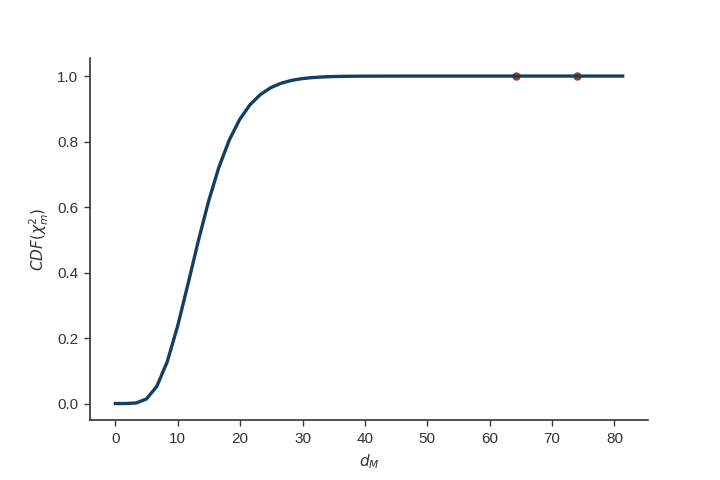

In [188]:
χ2 = sp.stats.chi2(df=m)
with plt.style.context({'axes.linewidth': 1,
                        'lines.linewidth': 2,
                        'font.size': 11}):
    parr = np.linspace(0, 1.1*max(χ2.ppf(0.99), *dm))
    plt.plot(parr, χ2.cdf(parr));
    plt.scatter(dm, χ2.cdf(dm), s=16, c=lib.colours[1])
    plt.xlabel("$d_M$")
    plt.ylabel("$CDF(χ^2_m)$")